In [1]:
import pandas as pd # Importing pandas library to do data manipulation
#made by Ayush Mishra

<html>
<body>
    <h1 style="color:red">Reading the data</h1>
</body>


In [2]:
df = pd.read_csv('01.Data Cleaning and Preprocessing.csv') # reading the csv file in pandas

In [3]:
df

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,31-01:00,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,31-03:00,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,10-16:00,23.75,12.667,93.450,1178.252,276.955,347.286,310.970,1.523,513.956,...,61.141,330.117,304.006,148.174,1027.201,1357.271,381.643,45.264,252.947,30.86
320,9-19:00,19.80,12.558,94.352,1184.119,297.071,399.135,319.576,1.451,570.058,...,67.667,330.848,304.616,165.178,906.962,1311.177,25.494,50.528,252.092,30.70
321,9-20:00,23.01,12.550,90.842,1188.517,289.826,373.633,314.591,1.457,549.306,...,66.446,330.226,304.686,160.841,887.125,1319.226,0.638,45.549,252.438,NaN
322,9-21:00,24.32,13.083,88.910,1192.879,318.006,364.081,308.559,1.523,504.852,...,61.054,327.346,304.363,147.589,804.423,1320.225,0.000,43.725,253.176,31.13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Observation      324 non-null    object 
 1   Y-Kappa          324 non-null    float64
 2   ChipRate         319 non-null    float64
 3   BF-CMratio       307 non-null    float64
 4   BlowFlow         308 non-null    float64
 5   ChipLevel4       323 non-null    float64
 6   T-upperExt-2     322 non-null    float64
 7   T-lowerExt-2     322 non-null    float64
 8   UCZAA            299 non-null    float64
 9   WhiteFlow-4      323 non-null    float64
 10  AAWhiteSt-4      173 non-null    float64
 11  AA-Wood-4        323 non-null    float64
 12  ChipMoisture-4   323 non-null    float64
 13  SteamFlow-4      323 non-null    float64
 14  Lower-HeatT-3    322 non-null    float64
 15  Upper-HeatT-3    322 non-null    float64
 16  ChipMass-4       323 non-null    float64
 17  WeakLiquorF     

In [5]:
df.shape

(324, 23)

All are numerical valued columns and we can observe that there are some missing values in many of the columns let's explore the missing values and handle them.

<html>
<body>
    <h1 style="color:yellow">Handling Missing Values</h1>
</body>

In [6]:
df.isnull().sum()

Observation          0
Y-Kappa              0
ChipRate             5
BF-CMratio          17
BlowFlow            16
ChipLevel4           1
T-upperExt-2         2
T-lowerExt-2         2
UCZAA               25
WhiteFlow-4          1
AAWhiteSt-4        151
AA-Wood-4            1
ChipMoisture-4       1
SteamFlow-4          1
Lower-HeatT-3        2
Upper-HeatT-3        2
ChipMass-4           1
WeakLiquorF          1
BlackFlow-2          2
WeakWashF            1
SteamHeatF-3         2
T-Top-Chips-4        1
SulphidityL-4      151
dtype: int64

**Since there is less data which is of only 324 rows we can't afford eliminating the rows with missing values, So we fill the missing values with mean, ffill, bfill**

In [7]:
# Fill with mean and ffill
df['ChipRate'].fillna(df['ChipRate'].mean(), inplace=True)
df['BF-CMratio'].fillna(df['BF-CMratio'].mean(), inplace=True)
df['BlowFlow'].fillna(df['BlowFlow'].mean(), inplace=True)
df['ChipLevel4 '].fillna(df['ChipLevel4 '].mean(), inplace=True)
df['T-upperExt-2 '].fillna(df['T-upperExt-2 '].mean(), inplace=True)
df['T-lowerExt-2  '].fillna(df['T-lowerExt-2  '].mean(), inplace=True)
df['UCZAA'].fillna(df['UCZAA'].mean(), inplace=True)
df['WhiteFlow-4 '].fillna(df['WhiteFlow-4 '].mean(), inplace=True)
df['AA-Wood-4  '].fillna(df['AA-Wood-4  '].mean(), inplace=True)
df['ChipMoisture-4 '].fillna(df['ChipMoisture-4 '].mean(), inplace=True)
df['SteamFlow-4 '].fillna(df['SteamFlow-4 '].mean(), inplace=True)
df['Lower-HeatT-3'].fillna(df['Lower-HeatT-3'].mean(), inplace=True)
df['Upper-HeatT-3 '].fillna(df['Upper-HeatT-3 '].mean(), inplace=True)
df['ChipMass-4 '].fillna(df['ChipMass-4 '].mean(), inplace=True)
df['WeakLiquorF '].fillna(df['WeakLiquorF '].mean(), inplace=True)
df['BlackFlow-2 '].fillna(df['BlackFlow-2 '].mean(), inplace=True)
df['WeakWashF '].fillna(df['WeakWashF '].mean(), inplace=True)
df['SteamHeatF-3 '].fillna(df['SteamHeatF-3 '].mean(), inplace=True)
df['T-Top-Chips-4 '].fillna(df['T-Top-Chips-4 '].mean(), inplace=True)

# Fill 'SulphidityL-4' and 'AAWhiteSt-4' with forward fill
df['SulphidityL-4 '].fillna(method='ffill', inplace=True)
df['SulphidityL-4 '].fillna(method='bfill', inplace=True) # to fill any null values after ffill

df['AAWhiteSt-4 '].fillna(method='ffill', inplace=True)
df['AAWhiteSt-4 '].fillna(method='bfill', inplace=True) # to fill any null values after ffill

# Verifying count of missing values
print(df.isnull().sum())


Observation        0
Y-Kappa            0
ChipRate           0
BF-CMratio         0
BlowFlow           0
ChipLevel4         0
T-upperExt-2       0
T-lowerExt-2       0
UCZAA              0
WhiteFlow-4        0
AAWhiteSt-4        0
AA-Wood-4          0
ChipMoisture-4     0
SteamFlow-4        0
Lower-HeatT-3      0
Upper-HeatT-3      0
ChipMass-4         0
WeakLiquorF        0
BlackFlow-2        0
WeakWashF          0
SteamHeatF-3       0
T-Top-Chips-4      0
SulphidityL-4      0
dtype: int64


C:\Users\Aayush Mishra\AppData\Local\Temp\ipykernel_10392\3066671778.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SulphidityL-4 '].fillna(method='ffill', inplace=True)
C:\Users\Aayush Mishra\AppData\Local\Temp\ipykernel_10392\3066671778.py:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SulphidityL-4 '].fillna(method='bfill', inplace=True) # to fill any null values after ffill
C:\Users\Aayush Mishra\AppData\Local\Temp\ipykernel_10392\3066671778.py:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AAWhiteSt-4 '].fillna(method='ffill', inplace=True)
C:\Users\Aayush Mishra\AppData\Local\Temp\ipykernel_10392\3066671778.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a futu

<html>
<body>
    <h1 style="color:green">Filtering data based on conditions</h1>
</body>

In [8]:
filtered_data = df[(df['ChipRate'] > 4) & (df['BlowFlow'] < 1000)]
filtered_data

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
182,7-13:00,23.83,14.227,87.464456,0.000,220.074,352.981,323.718,1.416,594.970,...,62.476,321.062,296.846,158.196,977.152,1092.896,81.065,51.821,249.353,29.88
279,11-14:00,21.27,11.383,84.165000,981.920,342.858,352.315,322.292,1.553,592.539,...,73.134,333.596,310.487,171.004,940.938,1375.202,189.529,52.600,251.797,30.40
280,11-15:00,23.74,11.667,88.130000,990.724,349.088,349.697,311.997,1.555,579.875,...,72.092,332.637,309.538,168.574,973.897,1373.252,81.375,46.994,252.021,30.40
281,11-16:00,24.41,11.242,80.458000,954.092,365.583,342.403,302.669,1.556,546.509,...,68.806,328.581,306.169,157.026,734.945,1384.979,143.417,39.700,252.479,30.15
283,11-18:00,20.37,10.967,99.982000,998.153,302.251,344.295,305.080,1.604,471.537,...,57.260,330.293,304.958,136.358,1067.280,1346.973,237.346,40.713,252.545,30.40


In [9]:
df[df['SulphidityL-4 '] > 31.7]

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
80,3-07:00,26.50,16.300,75.411,1229.199,358.256,352.871,325.690,1.416,531.174,...,59.183,319.990,296.154,149.077,701.273,1026.333,259.773,42.596,250.775,31.910
81,3-08:00,23.20,16.700,73.381,1225.454,288.327,353.400,325.761,1.532,546.814,...,60.071,319.983,295.603,150.092,784.624,1019.652,453.101,49.500,250.873,31.910
82,3-09:00,24.20,16.458,75.625,1244.665,270.511,355.729,328.243,1.484,611.104,...,70.490,321.568,297.158,171.818,845.316,1037.773,405.866,47.239,250.185,32.020
121,5-00:00,25.56,14.900,84.953,1289.167,373.726,358.028,326.809,1.265,568.074,...,63.684,320.797,296.457,147.131,860.372,1014.646,149.973,43.781,252.652,31.796
122,5-01:00,24.29,15.175,85.006,1294.216,320.890,358.343,327.266,1.309,592.336,...,67.921,320.908,296.201,155.093,895.670,1043.082,150.746,47.414,252.743,31.796
154,6-09:00,19.02,15.900,82.638,1292.604,218.707,362.036,330.491,1.546,695.383,...,74.131,322.848,294.929,174.603,1132.181,1145.090,278.136,54.438,250.063,32.840
155,6-10:00,16.12,15.642,81.822,1294.158,104.615,360.561,328.752,1.631,708.251,...,72.254,321.730,294.261,174.400,1099.527,1145.089,280.910,55.486,250.211,32.840


<html>
<body>
    <h1 style="color:blue">Caluclating Summary Statistics</h1>
</body>

In [10]:
df.describe()#made by Ayush Mishra

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.00000,324.000000,324.00000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,20.635370,14.347937,87.464456,1237.837614,258.164483,356.904295,324.02018,1.492010,591.73226,6.142130,...,66.668285,325.567820,300.525699,162.222322,873.828941,1175.917016,263.543068,49.696907,251.240087,30.417969
std,3.070036,1.487447,7.781774,98.070606,87.851143,9.180734,7.59777,0.101741,66.91253,0.080111,...,5.699744,4.595568,4.554318,14.138751,121.884406,148.870958,163.413391,4.537794,1.281444,0.688749
min,12.170000,9.983000,68.645000,0.000000,0.000000,339.168000,284.63300,1.182000,405.11100,5.890000,...,48.568000,318.051000,293.312000,113.922000,486.938000,838.948000,0.000000,35.510000,248.359000,29.010000
25%,18.382500,13.364750,82.156750,1194.525750,213.527000,350.291750,321.48600,1.436000,541.00225,6.092250,...,62.539000,321.386500,296.513750,153.089750,792.150250,1047.260500,134.688500,46.411250,250.312000,30.005000
50%,20.845000,14.347937,87.253500,1254.658500,271.605500,356.901648,325.63850,1.492010,592.71700,6.137500,...,67.408000,325.225500,299.184500,163.601000,865.457500,1152.547500,266.983500,50.192500,251.375000,30.385000
75%,23.032500,15.498250,92.123250,1288.628750,321.285000,362.104750,329.14700,1.555250,639.45775,6.200000,...,71.519500,329.835750,304.228250,172.555000,965.152250,1318.991750,405.411500,53.284750,252.319750,30.793000
max,27.600000,16.958000,121.717000,1351.240000,419.014000,399.135000,337.01200,1.747000,731.39400,6.340000,...,76.147000,333.854000,311.146000,189.268000,1226.277000,1395.767000,715.715000,63.332000,254.122000,32.840000


<html>
<head>
    <body>
        <h1 style="color:Orange;"> Interquartile Range (IQR) </h1> 
    </body>
</head>

In [11]:
df=df.drop_duplicates()
df

,Observation,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,31-00:00,23.10,16.520000,121.717,1177.607,169.805,358.282,329.545,1.44300,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,29.11
1,31-01:00,27.60,16.810000,79.022,1328.360,341.327,351.050,329.067,1.54900,537.201,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,31-02:00,23.19,16.709000,79.562,1329.407,239.161,350.022,329.260,1.60000,549.611,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,29.11
3,31-03:00,23.60,16.478000,81.011,1334.877,213.527,350.938,331.142,1.60400,623.362,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,31-04:00,22.90,15.618000,93.244,1334.168,243.131,351.640,332.709,1.49201,638.672,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,12-10:00,24.98,14.347937,85.034,1278.345,368.564,357.723,321.387,1.49201,520.365,...,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614,30.47
300,12-11:00,21.00,14.347937,88.013,1307.722,278.842,357.438,323.757,1.49201,553.070,...,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197,30.47
301,12-12:00,21.40,14.347937,85.490,1255.986,273.484,361.365,322.689,1.49201,590.199,...,71.456,333.032,308.732,174.069,986.206,1348.747,457.313,53.194,251.324,30.46
302,31-00:00,23.10,16.520000,121.717,1177.607,169.805,358.282,329.545,1.44300,599.253,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,30.46


In [12]:
df['S.no']=0
print(df.columns)

Index(['Observation', 'Y-Kappa', 'ChipRate', 'BF-CMratio', 'BlowFlow',
       'ChipLevel4 ', 'T-upperExt-2 ', 'T-lowerExt-2  ', 'UCZAA',
       'WhiteFlow-4 ', 'AAWhiteSt-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ',
       'SteamFlow-4 ', 'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ',
       'WeakLiquorF ', 'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ',
       'T-Top-Chips-4 ', 'SulphidityL-4 ', 'S.no'],
      dtype='object')


C:\Users\Aayush Mishra\AppData\Local\Temp\ipykernel_10392\3323388037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S.no']=0


In [13]:
df.drop(['S.no'],axis=1,inplace=True)
df.columns

C:\Users\Aayush Mishra\AppData\Local\Temp\ipykernel_10392\2152646953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['S.no'],axis=1,inplace=True)


Index(['Observation', 'Y-Kappa', 'ChipRate', 'BF-CMratio', 'BlowFlow',
       'ChipLevel4 ', 'T-upperExt-2 ', 'T-lowerExt-2  ', 'UCZAA',
       'WhiteFlow-4 ', 'AAWhiteSt-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ',
       'SteamFlow-4 ', 'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ',
       'WeakLiquorF ', 'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ',
       'T-Top-Chips-4 ', 'SulphidityL-4 '],
      dtype='object')

In [14]:
df1=df.fillna(value=0)

In [15]:
df1.drop(['Observation'],axis=1,inplace=True)

In [16]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
IQR=q3-q1
IQR

Y-Kappa              4.54250
ChipRate             2.11250
BF-CMratio           9.97800
BlowFlow            92.66500
ChipLevel4         105.03125
T-upperExt-2        11.87425
T-lowerExt-2         7.58250
UCZAA                0.12175
WhiteFlow-4         99.04325
AAWhiteSt-4          0.10650
AA-Wood-4            1.48375
ChipMoisture-4       2.16525
SteamFlow-4          8.75350
Lower-HeatT-3        8.56175
Upper-HeatT-3        7.77625
ChipMass-4          19.04350
WeakLiquorF        178.37125
BlackFlow-2        279.63550
WeakWashF          263.18000
SteamHeatF-3         6.90450
T-Top-Chips-4        2.02275
SulphidityL-4        0.70000
dtype: float64

In [17]:
df1=df1[~((df1<(q1-1.5*IQR))|(df1>(q3+1.5*IQR))).any(axis=1)]

In [18]:
df1

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
1,27.60,16.810000,79.022,1328.360,341.327,351.050,329.067,1.54900,537.201,6.076,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,23.19,16.709000,79.562,1329.407,239.161,350.022,329.260,1.60000,549.611,6.076,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,29.11
5,14.23,15.350000,85.518,1171.604,198.538,344.014,325.195,1.43600,628.245,6.020,...,65.225,322.103,298.517,165.814,826.243,907.641,595.875,52.807,249.580,30.34
6,13.49,13.700000,98.186,1243.688,116.275,346.208,326.982,1.43400,696.766,6.020,...,72.989,322.982,296.080,182.018,784.281,929.527,201.272,58.118,248.741,30.34
7,22.65,14.100000,91.887,1307.852,288.989,352.321,331.162,1.46800,625.549,6.143,...,71.298,329.662,301.539,179.886,837.178,1315.111,234.047,53.805,249.971,29.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,20.40,14.233000,89.790,1278.006,379.458,354.290,315.558,1.51500,491.374,6.340,...,60.424,331.980,308.078,140.301,975.016,1344.835,388.676,47.803,252.311,30.43
298,20.90,15.167000,84.640,1283.706,339.440,354.803,311.041,1.63500,532.419,6.340,...,65.561,332.924,307.626,145.299,832.906,1344.708,388.911,49.524,251.833,30.29
299,24.98,14.347937,85.034,1278.345,368.564,357.723,321.387,1.49201,520.365,6.220,...,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614,30.47
300,21.00,14.347937,88.013,1307.722,278.842,357.438,323.757,1.49201,553.070,6.220,...,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197,30.47


<html>
    <body>
        <h1 style="color:#930230"> Box Plot</h1>
    </body>
</html>

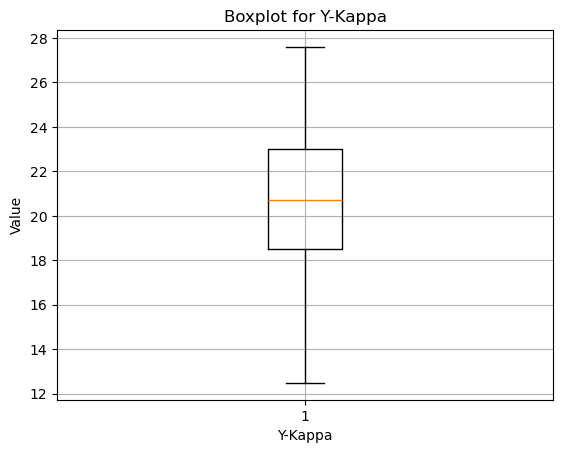

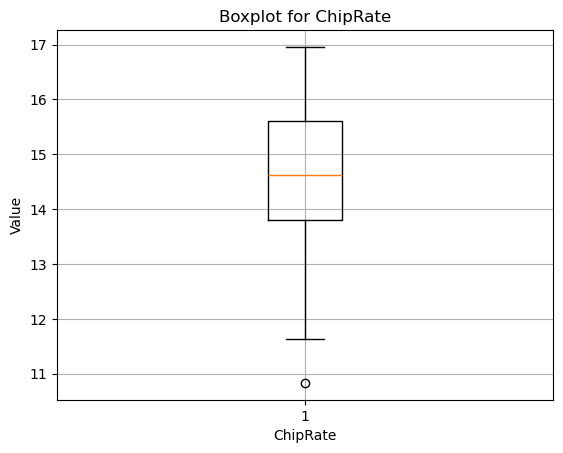

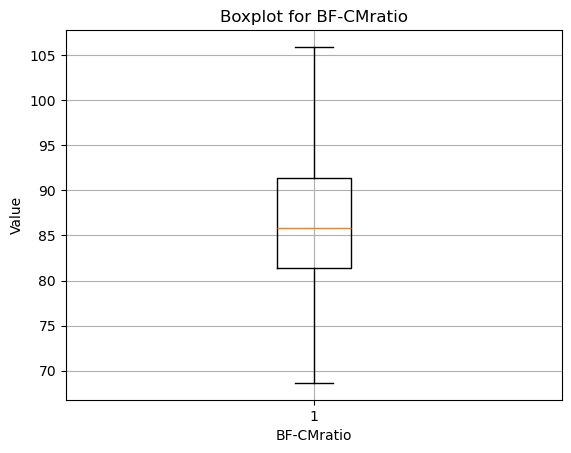

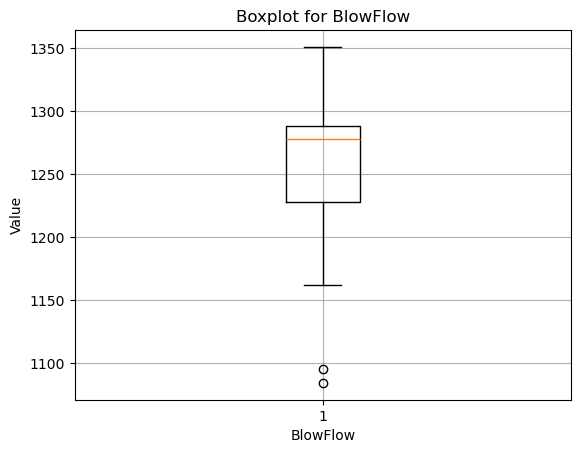

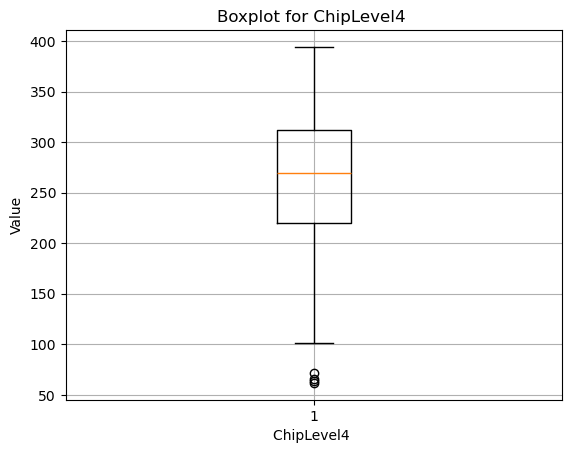

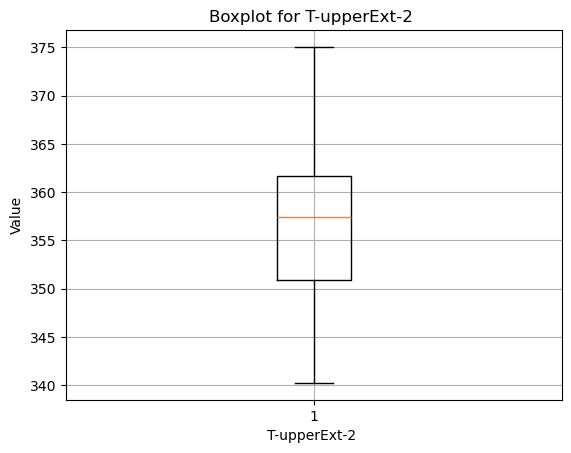

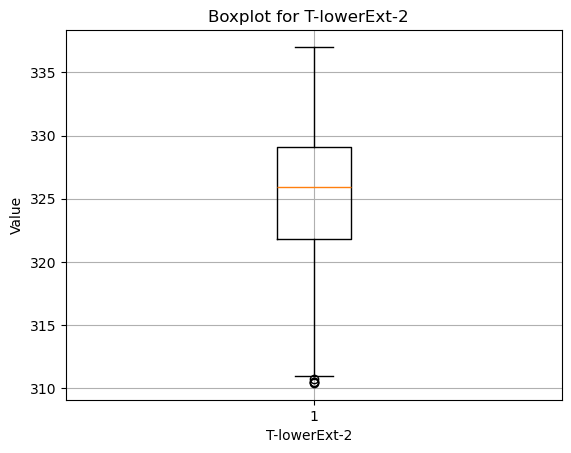

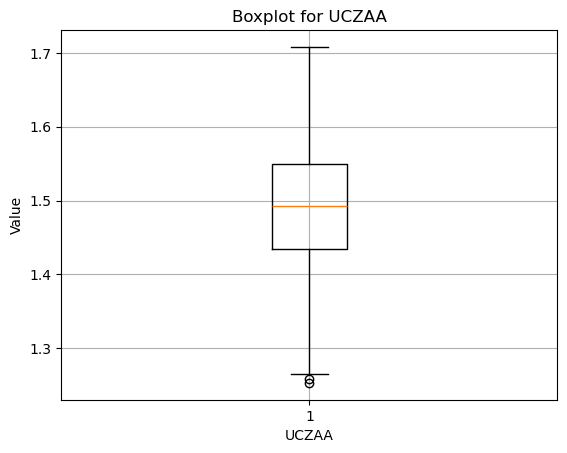

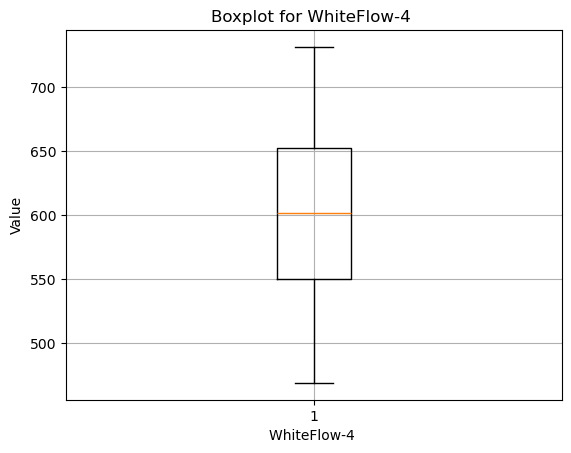

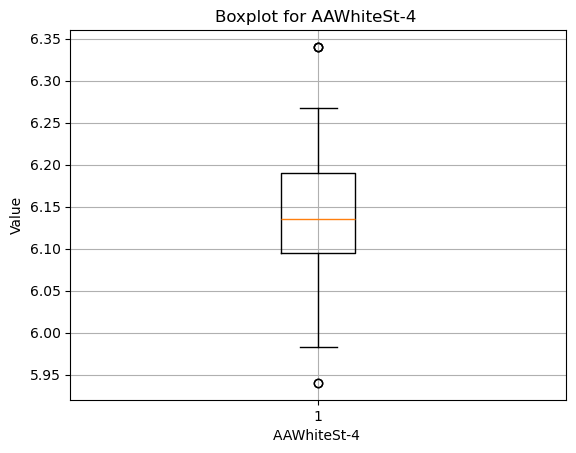

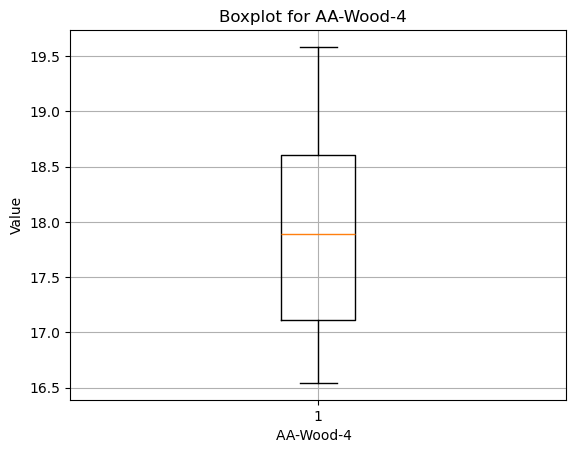

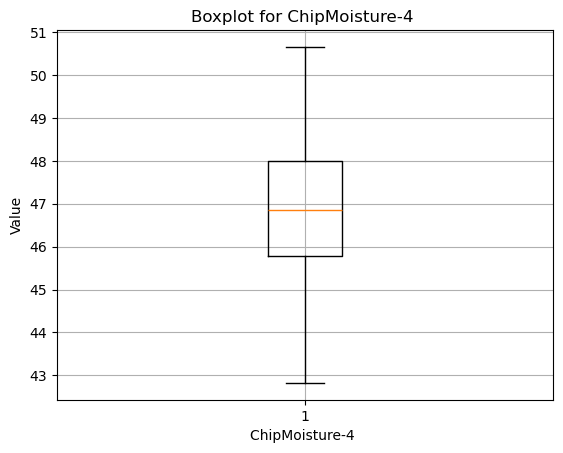

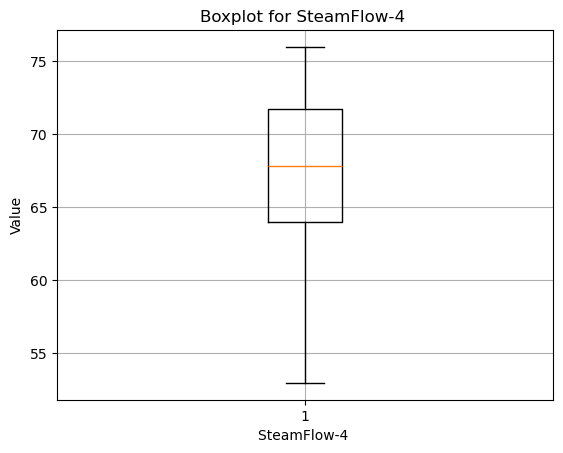

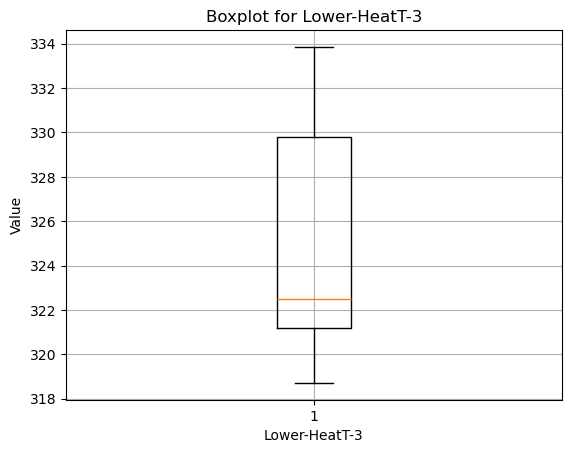

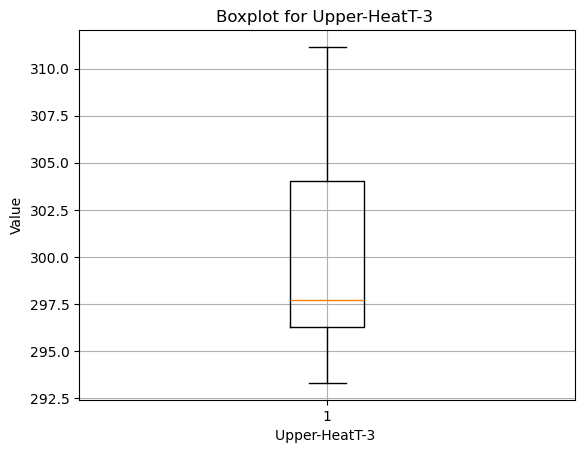

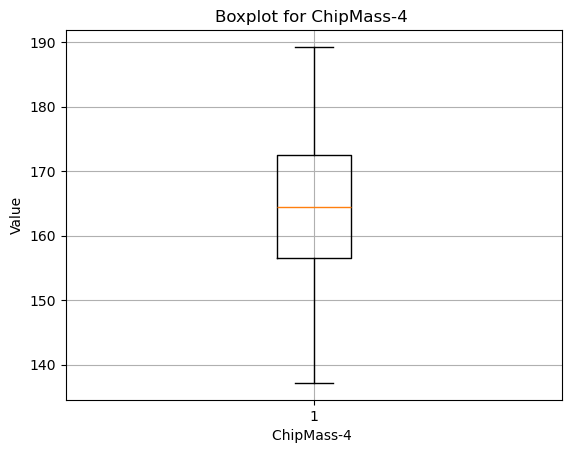

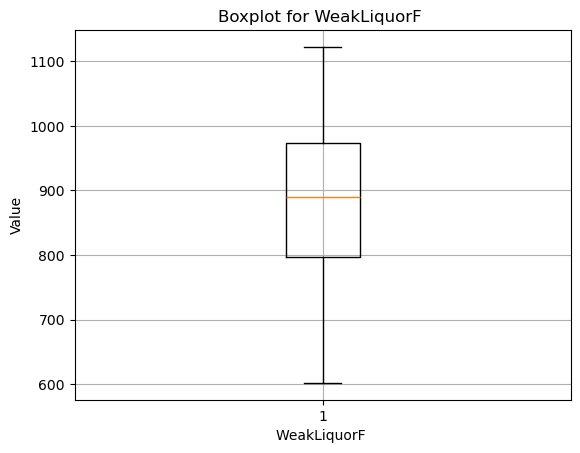

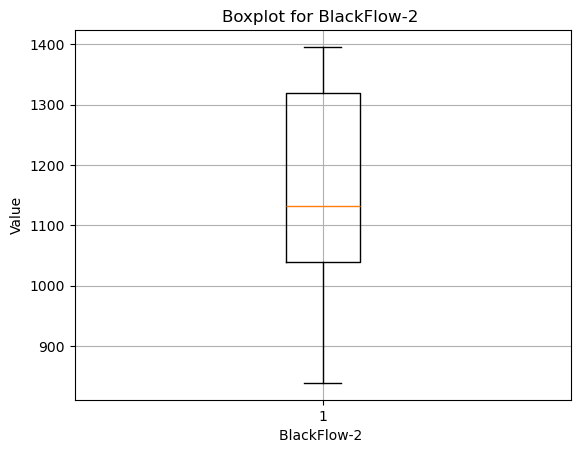

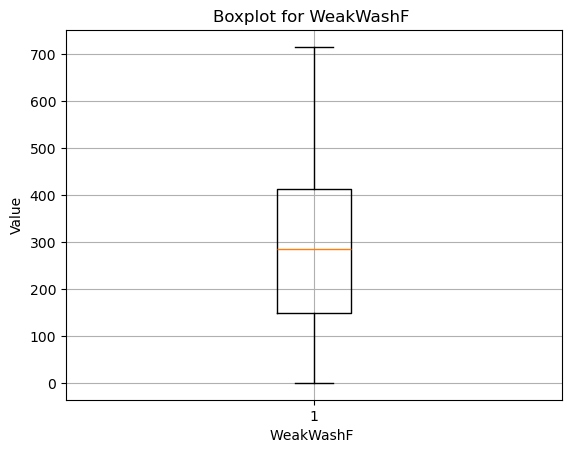

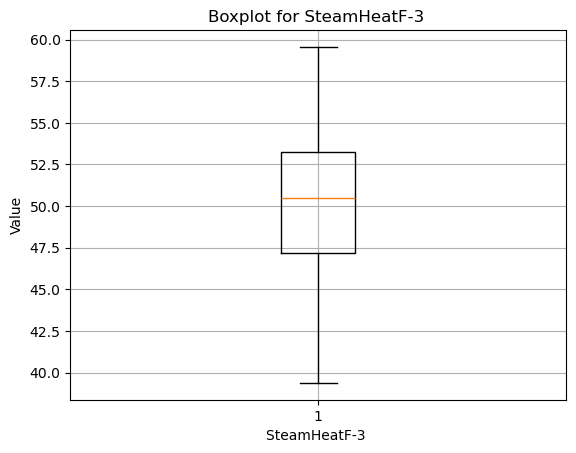

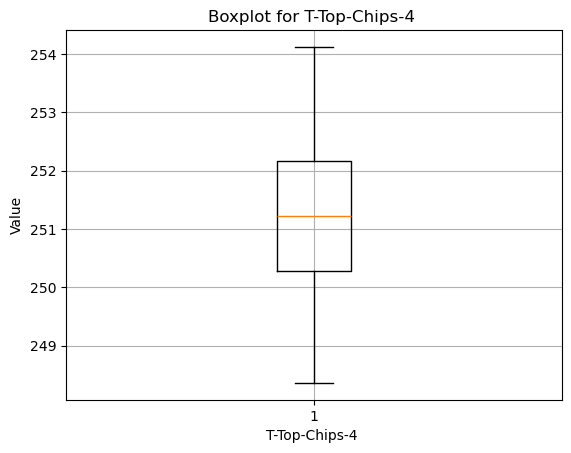

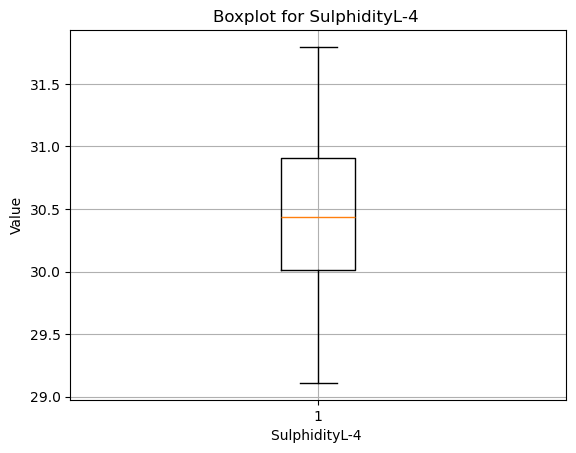

In [20]:
import matplotlib.pyplot as plt

#Made by Ayush Mishra

for col in df1.columns:
  plt.figure()  # Create a new figure for each column
  plt.boxplot(df1[col])
  plt.title(f"Boxplot for {col}")
  plt.xlabel(col)
  plt.ylabel("Value")
  plt.grid(True)
  plt.show()
